In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [6]:
#df = pd.read_csv(r"D:\nirukta\college folder\Data Analyst\data\application_train.csv", low_memory=False)
df1 = pd.read_csv(r"D:\nirukta\college folder\Data Analyst\data\application_train_Corrected.csv", low_memory=False)



In [7]:
df1.shape

(307511, 179)

In [8]:
print("Same number of rows?", len(df1) == len(df))
#df1 = df1.reset_index(drop=True)
#df = df.reset_index(drop=True)
#df1['SK_ID_CURR'] = df['SK_ID_CURR']
print("Same order of SK_ID_CURR?", (df1['SK_ID_CURR'] == df['SK_ID_CURR']).all())

Same number of rows? True
Same order of SK_ID_CURR? True


In [9]:
#df1['TARGET'] = df['TARGET']

In [10]:
print(df1['TARGET'].value_counts(normalize=True) * 100)

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


In [ ]:
#df1.to_csv(r"D:\nirukta\college folder\Data Analyst\data\application_train_Corrected.csv", index=False)

TARGET VARIABLE ANALYSIS

Class distribution:
 TARGET
0    282686
1     24825
Name: count, dtype: int64

 Percentage distribution:
 TARGET
0    91.93
1     8.07
Name: proportion, dtype: float64


C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4102136640.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=df1, palette=['#00BFC4', '#F8766D'])


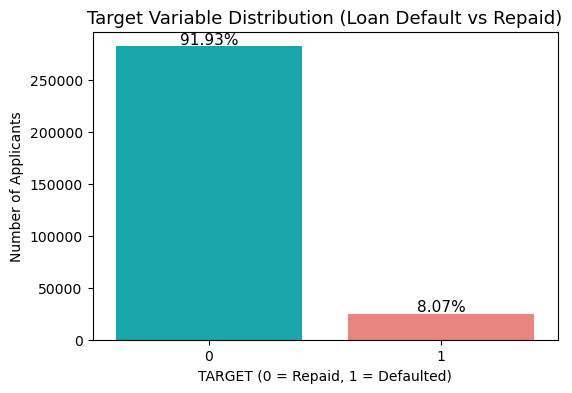


 Default Rate in Dataset: 8.07%


In [11]:
# Target variable distribution
target_counts = df1['TARGET'].value_counts()
target_percent = df1['TARGET'].value_counts(normalize=True) * 100

print("Class distribution:\n", target_counts)
print("\n Percentage distribution:\n", target_percent.round(2))

# Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='TARGET', data=df1, palette=['#00BFC4', '#F8766D'])
plt.title("Target Variable Distribution (Loan Default vs Repaid)", fontsize=13)
plt.xlabel("TARGET (0 = Repaid, 1 = Defaulted)")
plt.ylabel("Number of Applicants")

# Annotate percentages
total = len(df1)
for p in plt.gca().patches:
    count = p.get_height()
    percentage = 100 * count / total
    plt.text(p.get_x() + p.get_width()/2., count + 2000,
             f'{percentage:.2f}%', ha='center', fontsize=11)
plt.show()

# Default rate summary
default_rate = df1['TARGET'].mean() * 100
print(f"\n Default Rate in Dataset: {default_rate:.2f}%")


UNIVARIATE ANALYSIS

Numerical feature analysis

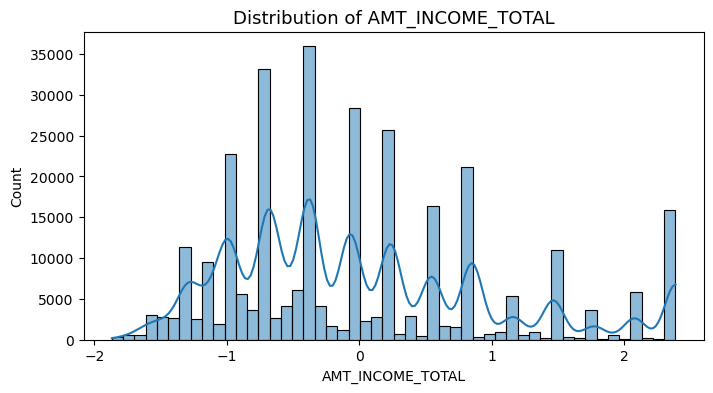

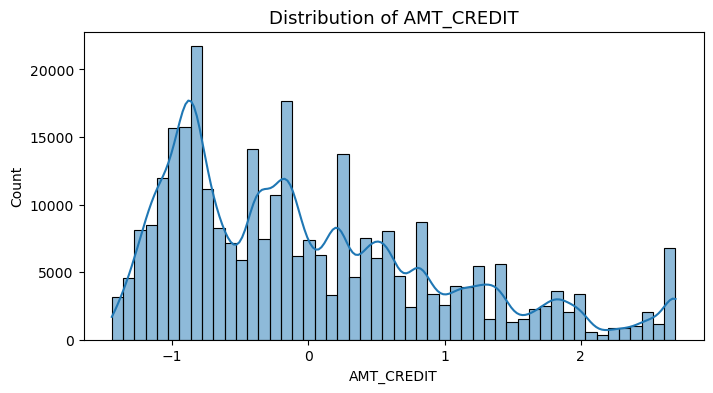

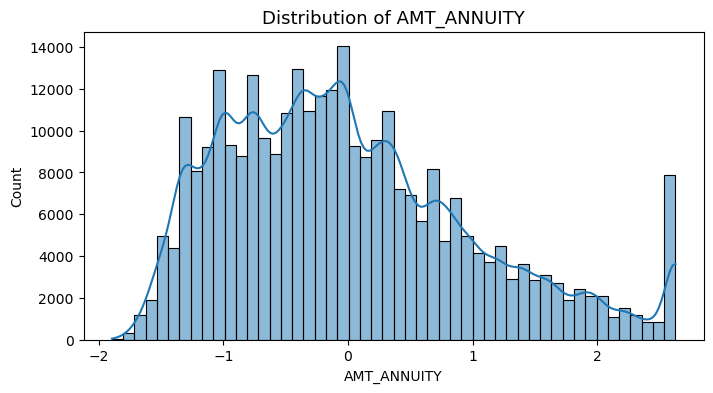

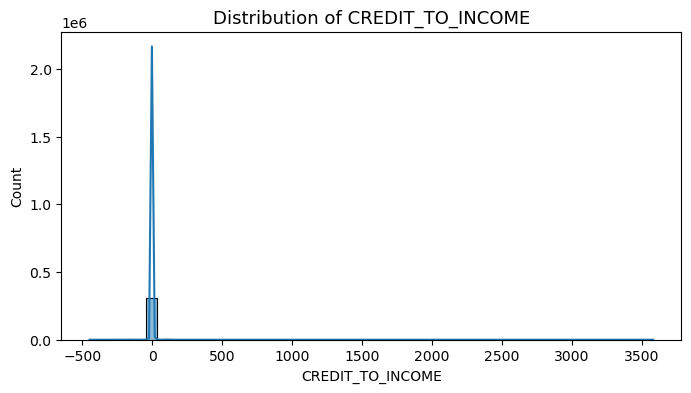

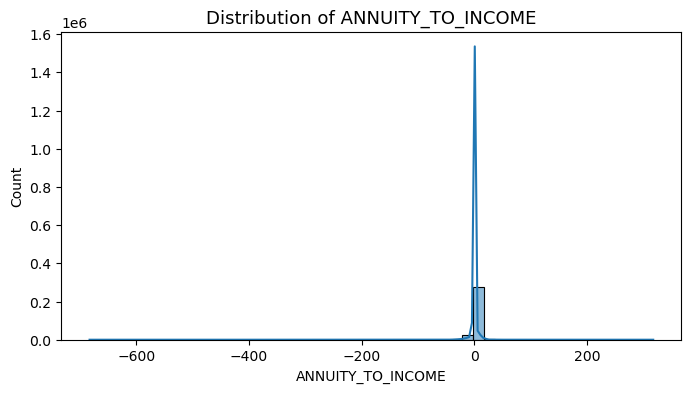

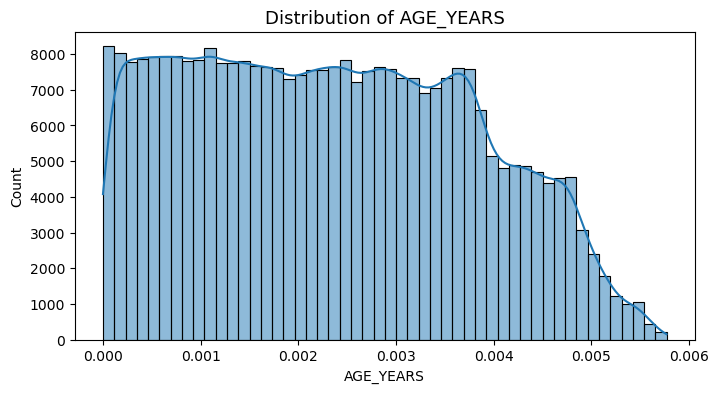

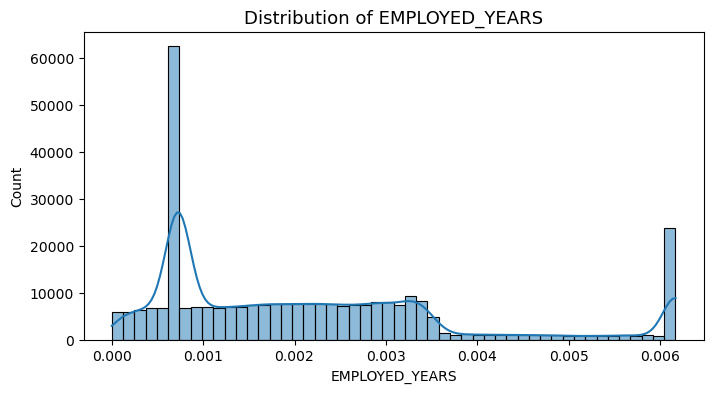

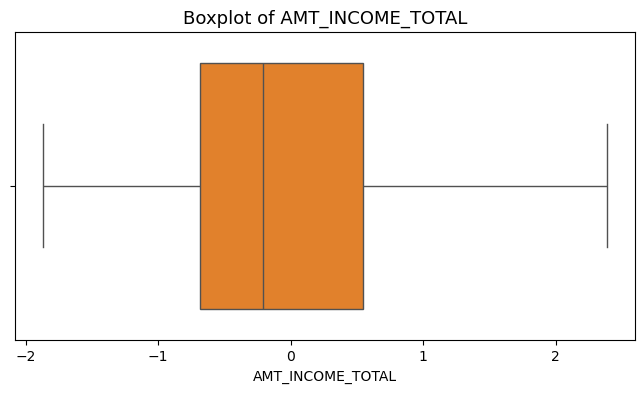

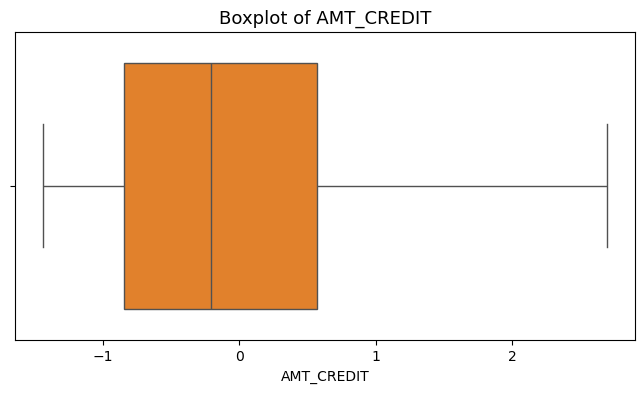

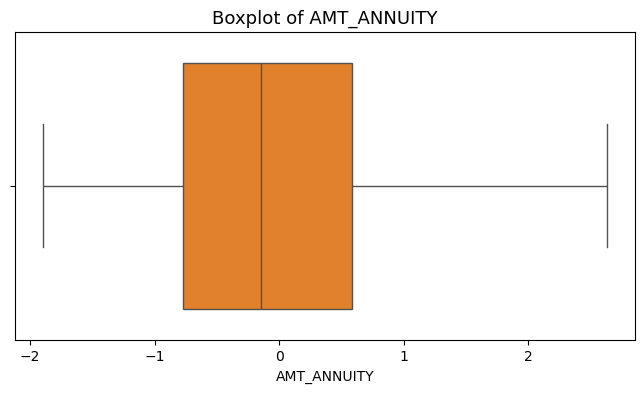

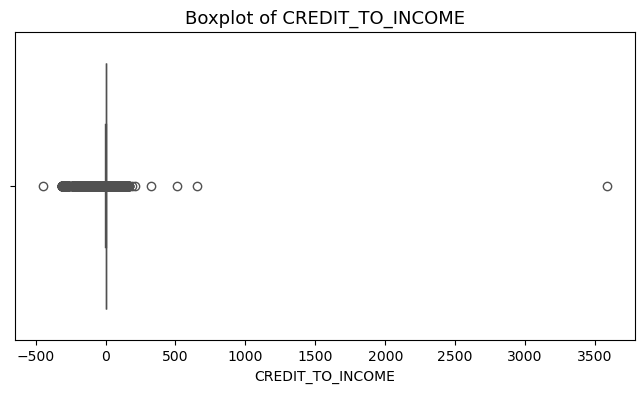

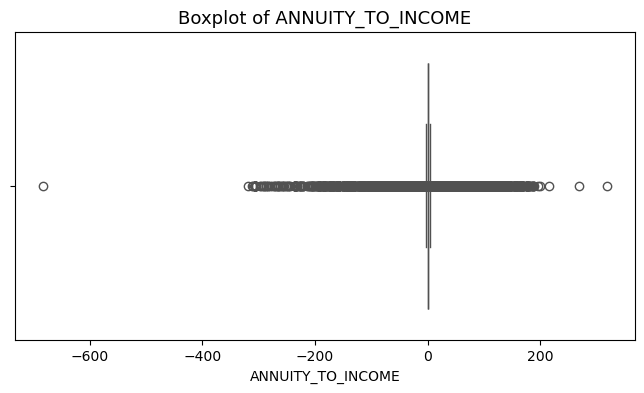

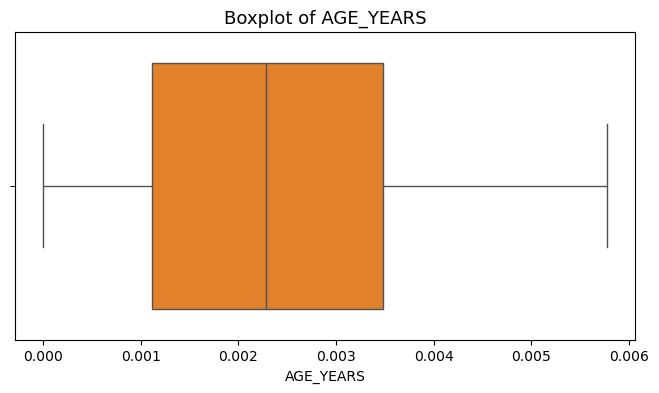

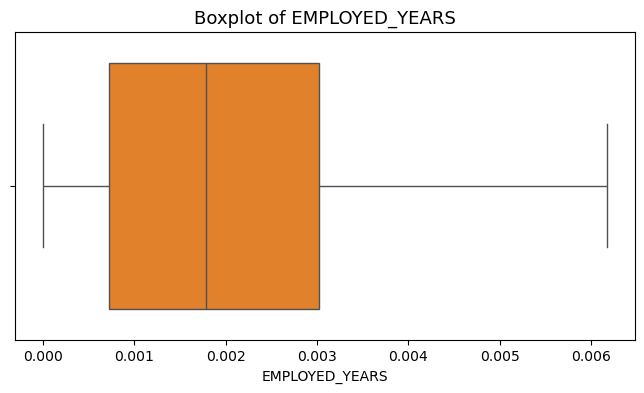

In [12]:
num_cols = df1.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col not in ['TARGET']]  


df1[num_cols].describe().T.round(2)
important_num_cols = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
    'CREDIT_TO_INCOME', 'ANNUITY_TO_INCOME', 
    'AGE_YEARS', 'EMPLOYED_YEARS'
]

# Plot histograms with KDE (density curve)
import seaborn as sns
import matplotlib.pyplot as plt

for col in important_num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df1[col], kde=True, bins=50, color='#1f77b4')
    plt.title(f"Distribution of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

for col in important_num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df1[col], color='#ff7f0e')
    plt.title(f"Boxplot of {col}", fontsize=13)
    plt.show()


CATEGORICAL FEATURE ANALYSIS

In [14]:
# Identify binary (dummy) columns
binary_cols = [col for col in df1.columns if df1[col].nunique() == 2 and col != 'TARGET']

print("📋 Total binary columns:", len(binary_cols))
print(binary_cols[:15])  # show first few


📋 Total binary columns: 123
['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_PHONE', 'FLAG_DOCUMENT_3', 'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Spouse, partner', 'NAME_TYPE_SUITE_Unaccompanied', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant']


In [15]:
binary_summary = pd.DataFrame({
    'Feature': binary_cols,
    'Category_1_Percent': [df1[col].mean() * 100 for col in binary_cols]
}).sort_values(by='Category_1_Percent', ascending=False)

print("📊 Category prevalence (% of 1s):")
binary_summary.head(10)


📊 Category prevalence (% of 1s):


,Feature,Category_1_Percent
122,HIGH_ANNUITY_INCOME_RATIO,5.838133e+01
121,HIGH_CREDIT_INCOME_RATIO,6.297661e+00
32,OCCUPATION_TYPE_Cooking staff,1.296723e-14
27,NAME_HOUSING_TYPE_Municipal apartment,1.135903e-14
99,ORGANIZATION_TYPE_Trade: type 2,1.093388e-14
35,OCCUPATION_TYPE_HR staff,1.088767e-14
42,OCCUPATION_TYPE_Private service staff,1.070282e-14
25,NAME_FAMILY_STATUS_Widow,1.048100e-14
57,ORGANIZATION_TYPE_Business Entity Type 2,9.556747e-15
12,NAME_INCOME_TYPE_Maternity leave,9.362654e-15


In [ ]:
rare_cols = binary_summary[binary_summary['Category_1_Percent'] < 1]['Feature']
df1.drop(columns=rare_cols, inplace=True)
print(f" Dropped {len(rare_cols)} rare encoded columns (<1% prevalence).")

# dropping columns with less than 1% prevalence of category 1

✅ Dropped 121 rare encoded columns (<1% prevalence).


In [18]:
print("Remaining columns:", df1.shape[1])

Remaining columns: 58


In [27]:
binary_cols = [col for col in df1.columns if df1[col].nunique() == 2 and col != 'TARGET']

print("📋 Total encoded categorical columns:", len(binary_cols))
print(binary_cols[:10])


📋 Total encoded categorical columns: 2
['HIGH_CREDIT_INCOME_RATIO', 'HIGH_ANNUITY_INCOME_RATIO']


In [25]:
for col in ['HIGH_CREDIT_INCOME_RATIO', 'HIGH_ANNUITY_INCOME_RATIO']:
    count_1 = df1[col].sum()
    percent_1 = df1[col].mean() * 100
    print(f"{col}: {count_1:,} applicants ({percent_1:.2f}%) have flag = 1")

HIGH_CREDIT_INCOME_RATIO: 19,366 applicants (6.30%) have flag = 1
HIGH_ANNUITY_INCOME_RATIO: 179,529 applicants (58.38%) have flag = 1


C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4248468854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['HIGH_CREDIT_INCOME_RATIO', 'HIGH_ANNUITY_INCOME_RATIO'],


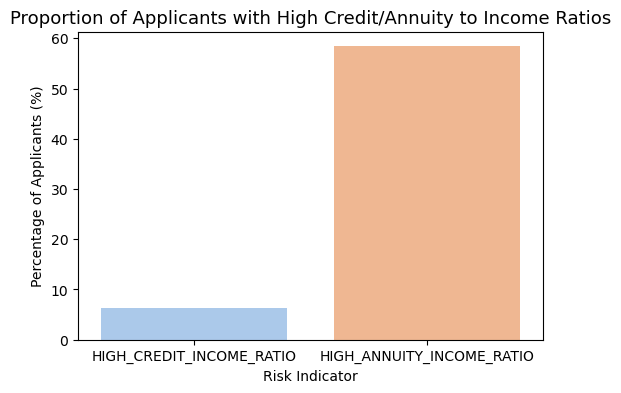

In [26]:

plt.figure(figsize=(6,4))
sns.barplot(x=['HIGH_CREDIT_INCOME_RATIO', 'HIGH_ANNUITY_INCOME_RATIO'],
            y=[df1['HIGH_CREDIT_INCOME_RATIO'].mean() * 100,
               df1['HIGH_ANNUITY_INCOME_RATIO'].mean() * 100],
            palette='pastel')
plt.title("Proportion of Applicants with High Credit/Annuity to Income Ratios", fontsize=13)
plt.ylabel("Percentage of Applicants (%)")
plt.xlabel("Risk Indicator")
plt.show()

In [28]:
df1.columns

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK'

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


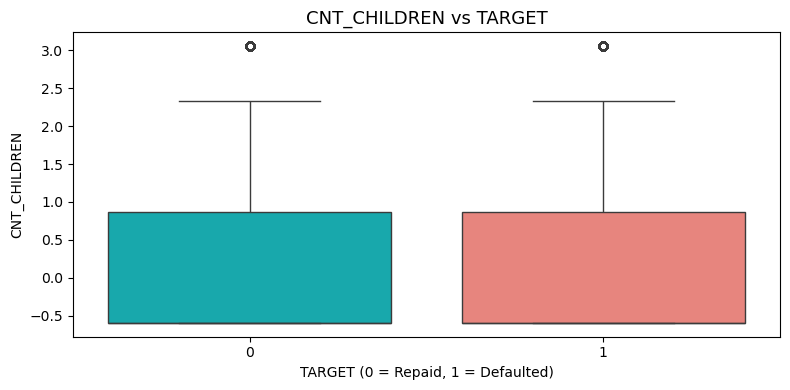

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


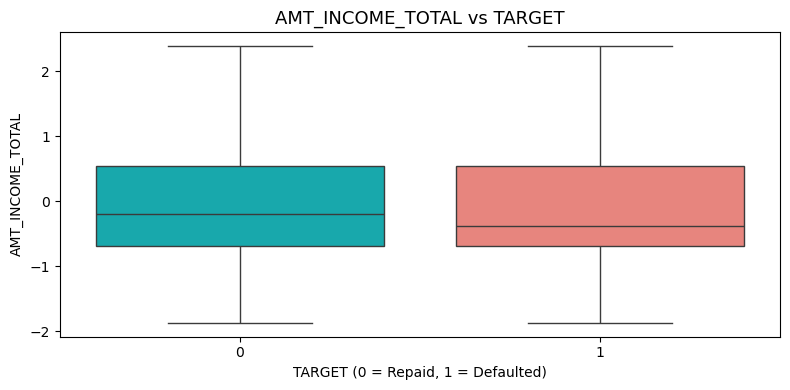

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


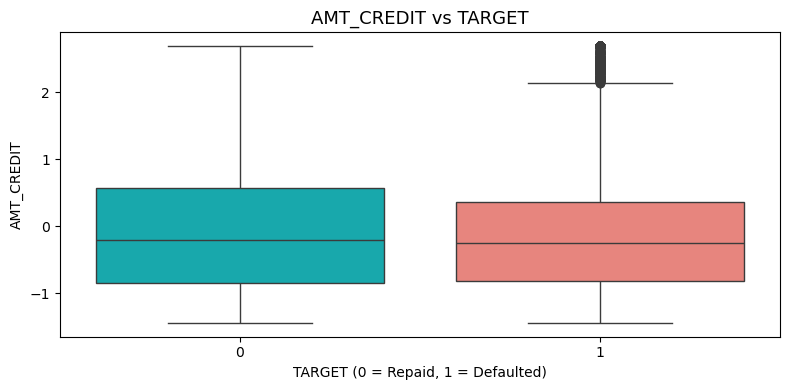

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


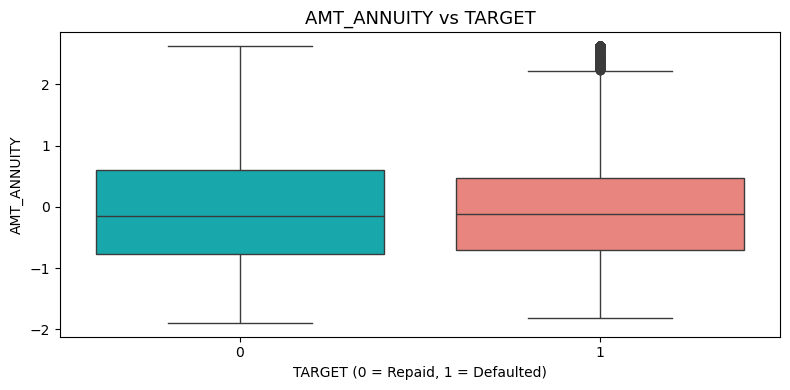

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


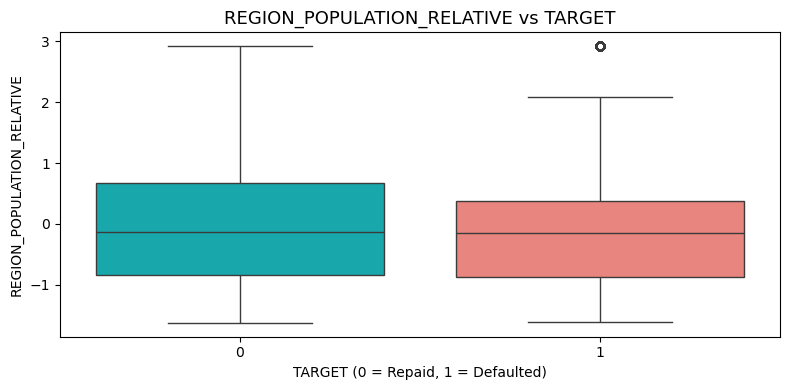

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


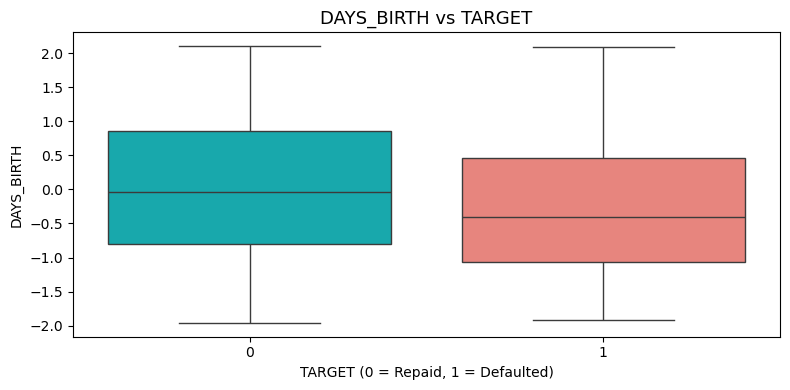

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


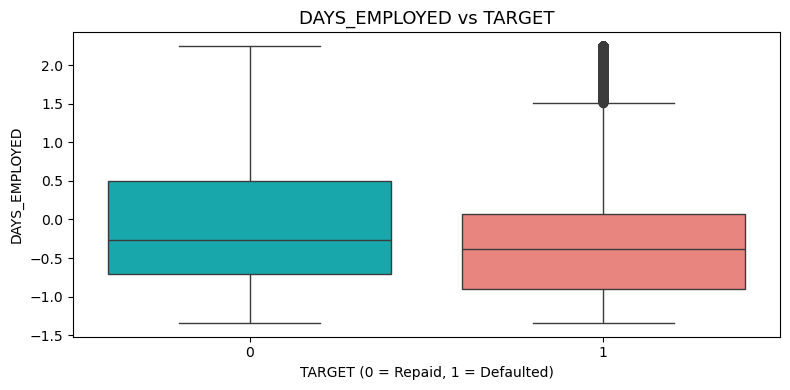

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


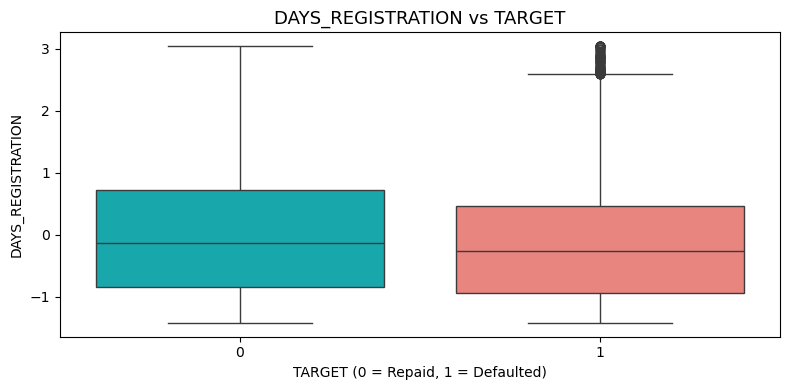

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


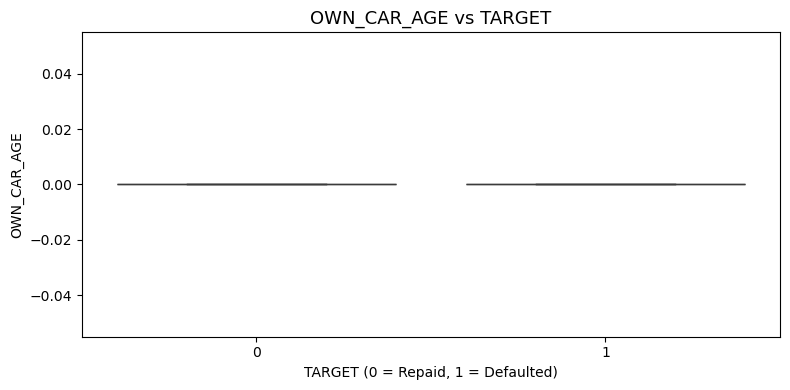

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


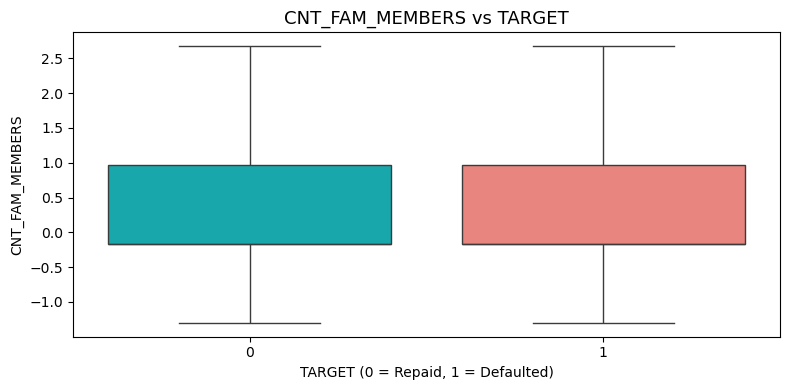

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


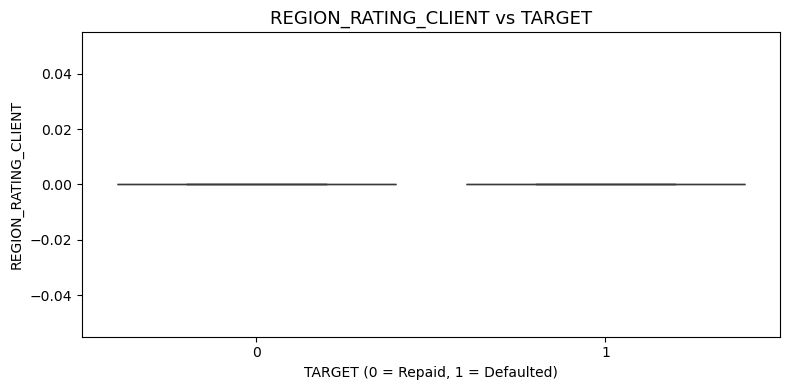

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


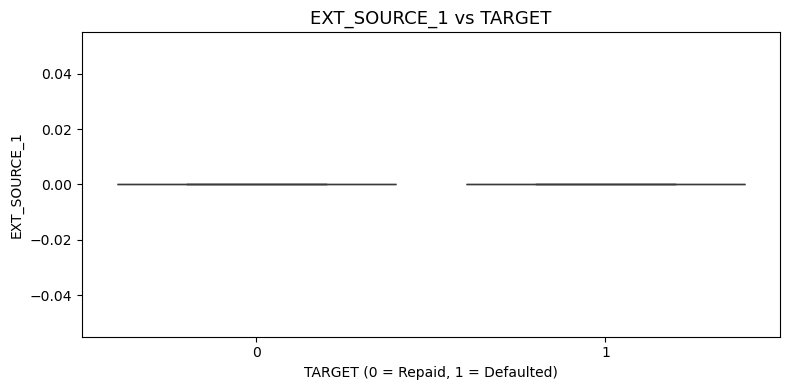

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


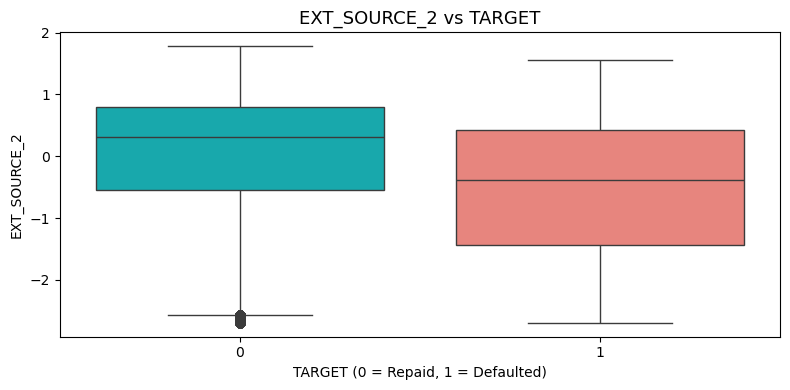

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


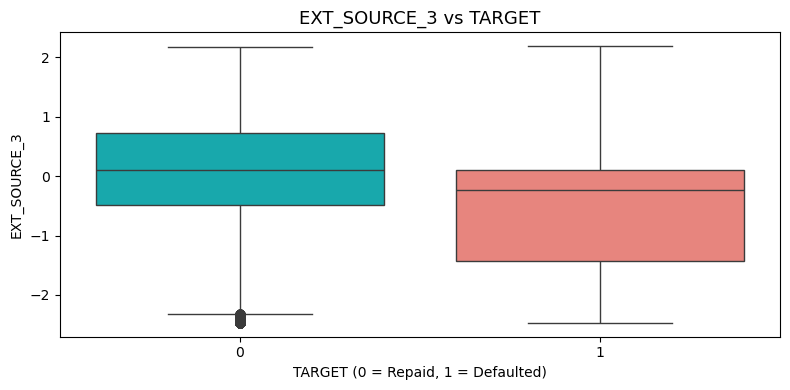

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


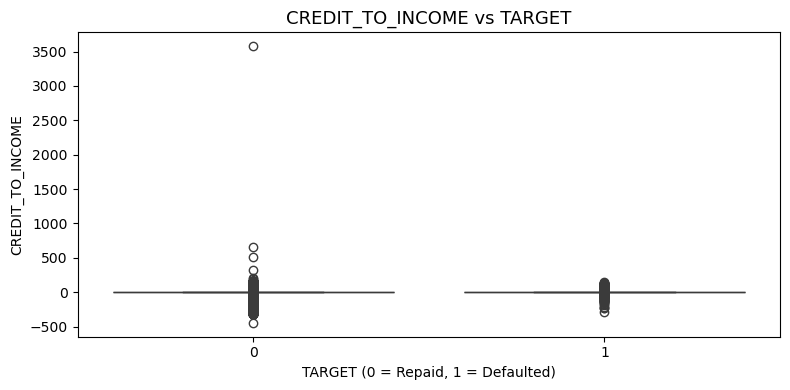

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


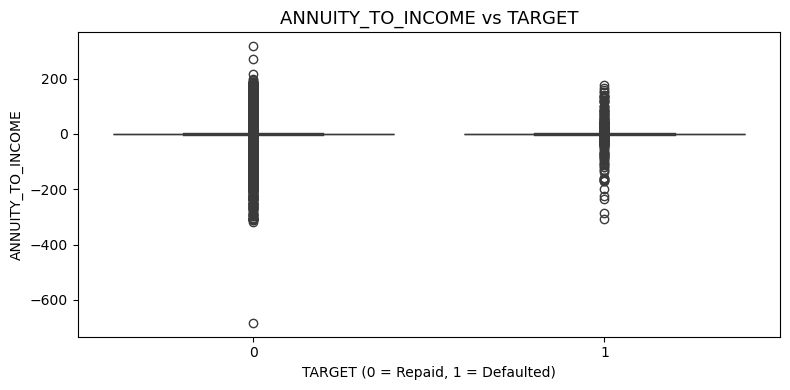

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


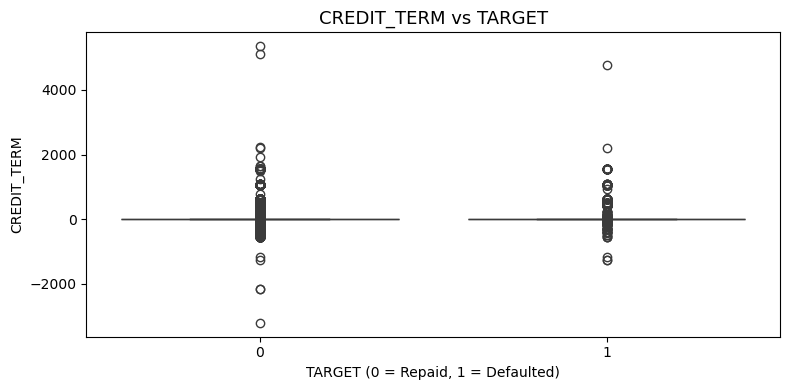

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


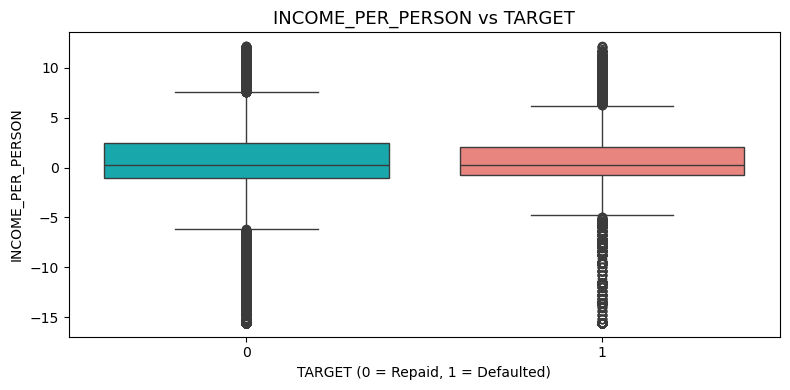

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


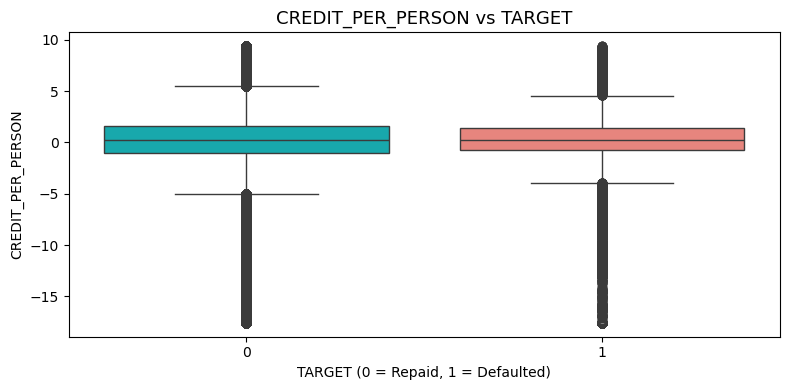

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


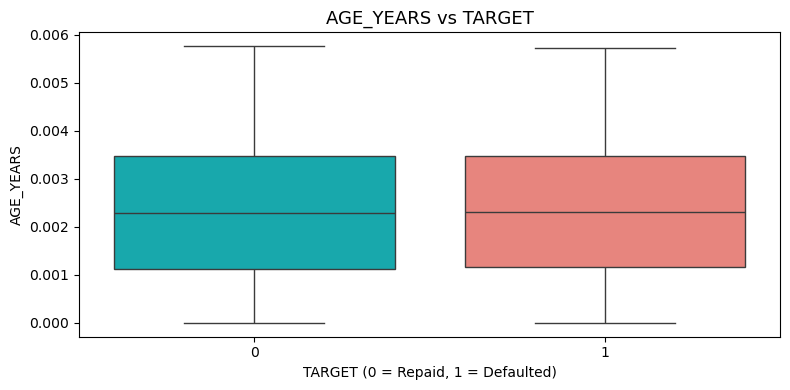

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


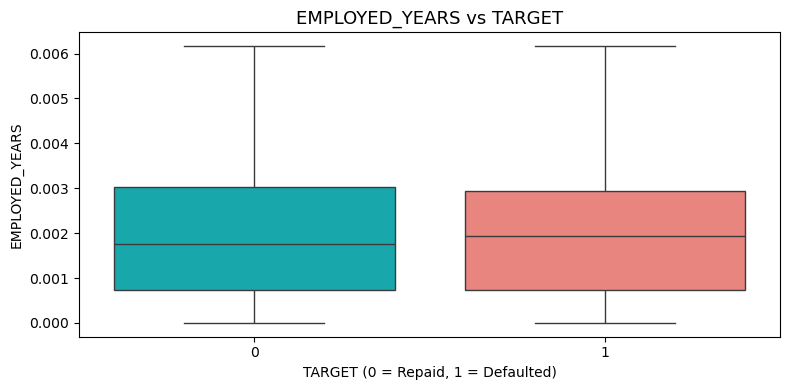

C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4037680806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])


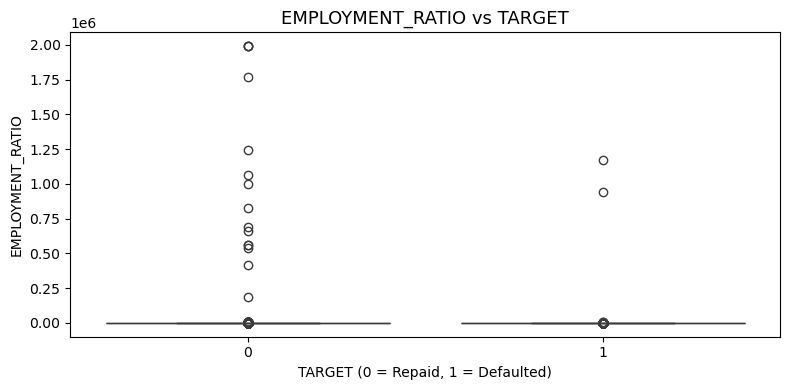

📊 Mean Comparison of Numeric Features:


,Non-Default (0),Default (1),Difference
EMPLOYMENT_RATIO,60.518595,89.565819,29.047224
CREDIT_TERM,3.367629,10.026639,6.659010
CREDIT_PER_PERSON,-0.263443,0.119668,0.383111
INCOME_PER_PERSON,0.004615,0.188729,0.184115
CREDIT_TO_INCOME,0.349212,0.441048,0.091836
CNT_CHILDREN,-0.005574,0.063475,0.069050
CNT_FAM_MEMBERS,-0.002542,0.028945,0.031487
AGE_YEARS,0.002340,0.002347,0.000007
OWN_CAR_AGE,0.000000,0.000000,0.000000
REGION_RATING_CLIENT,0.000000,0.000000,0.000000


In [30]:
num_cols = [
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
    'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
    'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'CREDIT_TO_INCOME', 'ANNUITY_TO_INCOME', 'CREDIT_TERM',
    'INCOME_PER_PERSON', 'CREDIT_PER_PERSON', 'AGE_YEARS',
    'EMPLOYED_YEARS', 'EMPLOYMENT_RATIO'
]

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='TARGET', y=col, data=df1, palette=['#00BFC4', '#F8766D'])
    plt.title(f"{col} vs TARGET", fontsize=13)
    plt.xlabel("TARGET (0 = Repaid, 1 = Defaulted)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

numeric_means = df1.groupby('TARGET')[num_cols].mean().T
numeric_means.columns = ['Non-Default (0)', 'Default (1)']
numeric_means['Difference'] = numeric_means['Default (1)'] - numeric_means['Non-Default (0)']
print("📊 Mean Comparison of Numeric Features:")
display(numeric_means.sort_values(by='Difference', ascending=False).head(15))


 Default rate (%) by binary feature:


,Feature,Default_Rate_If_1,Default_Rate_If_0
2,SHORT_EMPLOYMENT,8.072882,NaN
3,YOUNG_BORROWER,8.072882,NaN
0,HIGH_CREDIT_INCOME_RATIO,7.905608,8.084124
1,HIGH_ANNUITY_INCOME_RATIO,7.613812,8.716851


C:\Users\mudga\AppData\Local\Temp\ipykernel_8328\4027305058.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Default_Rate_If_1', y='Feature',


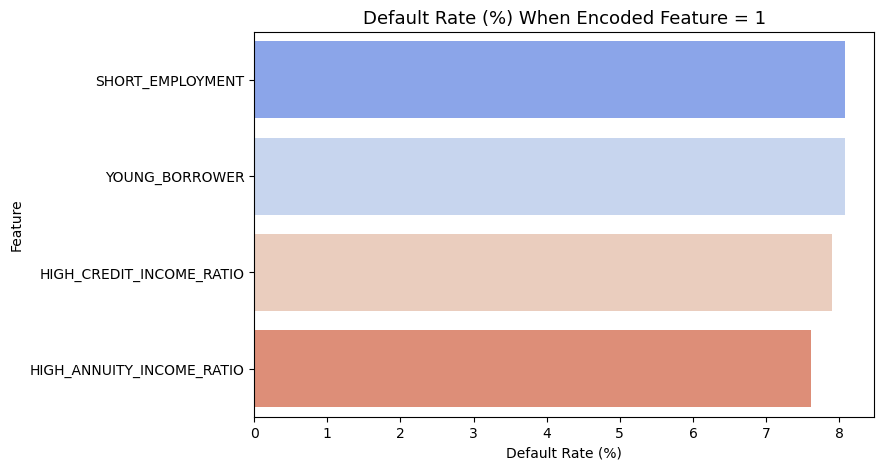

In [32]:
binary_cols = ['HIGH_CREDIT_INCOME_RATIO', 'HIGH_ANNUITY_INCOME_RATIO',
               'SHORT_EMPLOYMENT', 'YOUNG_BORROWER']


bivariate_data = []

for col in binary_cols:
    default_rate_1 = df1[df1[col] == 1]['TARGET'].mean() * 100
    default_rate_0 = df1[df1[col] == 0]['TARGET'].mean() * 100
    bivariate_data.append({
        'Feature': col,
        'Default_Rate_If_1': default_rate_1,
        'Default_Rate_If_0': default_rate_0
    })


bivariate_results = pd.DataFrame(bivariate_data)

print(" Default rate (%) by binary feature:")
display(bivariate_results.sort_values(by='Default_Rate_If_1', ascending=False))

plt.figure(figsize=(8,5))
sns.barplot(x='Default_Rate_If_1', y='Feature',
            data=bivariate_results.sort_values(by='Default_Rate_If_1', ascending=False),
            palette='coolwarm')
plt.title("Default Rate (%) When Encoded Feature = 1", fontsize=13)
plt.xlabel("Default Rate (%)")
plt.ylabel("Feature")
plt.show()

 Correlation of Features with TARGET:


TARGET                         1.000000
CREDIT_TERM                    0.028321
CREDIT_PER_PERSON              0.021533
CNT_CHILDREN                   0.018810
AMT_REQ_CREDIT_BUREAU_YEAR     0.011884
OBS_30_CNT_SOCIAL_CIRCLE       0.010599
INCOME_PER_PERSON              0.010576
CNT_FAM_MEMBERS                0.008578
CREDIT_TO_INCOME               0.002132
AGE_YEARS                      0.001346
EMPLOYMENT_RATIO               0.000901
HIGH_CREDIT_INCOME_RATIO      -0.001592
SK_ID_CURR                    -0.002108
ANNUITY_TO_INCOME             -0.002761
AMT_ANNUITY                   -0.009595
EMPLOYED_YEARS                -0.012595
HIGH_ANNUITY_INCOME_RATIO     -0.019959
YEARS_BEGINEXPLUATATION_AVG   -0.021999
AMT_INCOME_TOTAL              -0.022463
HOUR_APPR_PROCESS_START       -0.024272
AMT_CREDIT                    -0.029467
REGION_POPULATION_RELATIVE    -0.036323
DAYS_REGISTRATION             -0.041981
YEARS_ID_PUBLISH              -0.051457
DAYS_LAST_PHONE_CHANGE        -0.055236


TARGET                         1.000000
CREDIT_TERM                    0.028321
CREDIT_PER_PERSON              0.021533
CNT_CHILDREN                   0.018810
AMT_REQ_CREDIT_BUREAU_YEAR     0.011884
OBS_30_CNT_SOCIAL_CIRCLE       0.010599
INCOME_PER_PERSON              0.010576
CNT_FAM_MEMBERS                0.008578
CREDIT_TO_INCOME               0.002132
AGE_YEARS                      0.001346
EMPLOYMENT_RATIO               0.000901
HIGH_CREDIT_INCOME_RATIO      -0.001592
SK_ID_CURR                    -0.002108
ANNUITY_TO_INCOME             -0.002761
AMT_ANNUITY                   -0.009595
EMPLOYED_YEARS                -0.012595
HIGH_ANNUITY_INCOME_RATIO     -0.019959
YEARS_BEGINEXPLUATATION_AVG   -0.021999
AMT_INCOME_TOTAL              -0.022463
HOUR_APPR_PROCESS_START       -0.024272
AMT_CREDIT                    -0.029467
REGION_POPULATION_RELATIVE    -0.036323
DAYS_REGISTRATION             -0.041981
YEARS_ID_PUBLISH              -0.051457
DAYS_LAST_PHONE_CHANGE        -0.055236


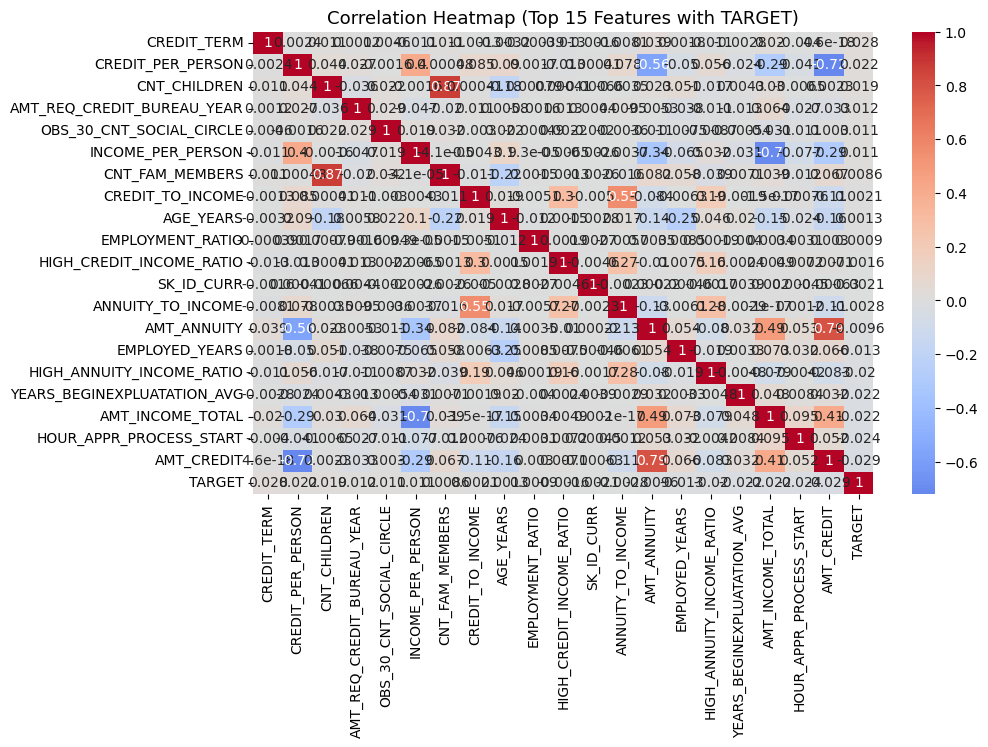

In [37]:
# Compute correlation of all numeric features with TARGET
corr_with_target = df1.corr()['TARGET'].sort_values(ascending=False)
print(" Correlation of Features with TARGET:")
display(corr_with_target.head(58))
display(corr_with_target.tail(58))

# Visualize with a heatmap (top correlated features)
top_corr_features = corr_with_target[1:21].index  # skip TARGET itself
plt.figure(figsize=(10,6))
sns.heatmap(df1[top_corr_features.to_list() + ['TARGET']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Top 15 Features with TARGET)", fontsize=13)
plt.show()


In [ ]:
corr_matrix = df1.drop(columns=['TARGET']).corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_features = [column for column in upper.columns if any(upper[column] > 0.8)]

print("Highly correlated features (corr > 0.8):")
print(high_corr_features)

df1.drop(columns=high_corr_features, inplace=True)


Highly correlated features (corr > 0.8):
[]
Dropped 0 highly correlated features.


In [ ]:
X_vif = df1.select_dtypes(include=['float64', 'int64']).drop(columns=['TARGET'])

vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

print(" Variance Inflation Factor (VIF) results:")
display(vif_data.sort_values(by='VIF', ascending=False).head(15))

# no multicollinearity found > 10, so no features dropped based on VIF

d:\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
d:\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


 Variance Inflation Factor (VIF) results:


,Feature,VIF
2,AMT_CREDIT,4.122239
3,AMT_ANNUITY,3.010594
1,AMT_INCOME_TOTAL,2.611146
47,CREDIT_PER_PERSON,2.489169
46,INCOME_PER_PERSON,2.379553
6,DAYS_EMPLOYED,1.650791
49,EMPLOYED_YEARS,1.592470
44,ANNUITY_TO_INCOME,1.557725
43,CREDIT_TO_INCOME,1.515407
5,DAYS_BIRTH,1.498524


In [42]:
df1.shape

(307511, 57)

In [43]:
df1.to_csv(r"D:\nirukta\college folder\Data Analyst\data\application_train_FinalEDA.csv", index=False)